In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.shape

(920, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [7]:
def check_value_counts(df,feature):
    data=df.copy()
    print(data[feature].value_counts())
    print("="*20)
    print('\n')

In [8]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
columns=['dataset','cp','restecg','slope','thal']
for feature in columns:
    check_value_counts(df,feature)

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64




In [10]:
df.groupby('sex')['num'].value_counts()

sex     num
Female  0      144
        1       30
        2       10
        3        8
        4        2
Male    0      267
        1      235
        2       99
        3       99
        4       26
Name: count, dtype: int64

In [11]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

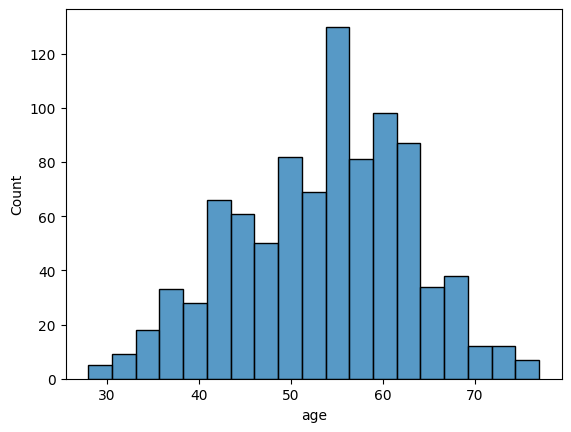

In [12]:
sns.histplot(df['age'])
plt.show()

In [16]:
df.groupby('num')['dataset'].value_counts()

num  dataset      
0    Hungary          187
     Cleveland        165
     VA Long Beach     51
     Switzerland        8
1    Hungary          106
     VA Long Beach     56
     Cleveland         55
     Switzerland       48
2    VA Long Beach     41
     Cleveland         36
     Switzerland       32
3    VA Long Beach     42
     Cleveland         35
     Switzerland       30
4    Cleveland         13
     VA Long Beach     10
     Switzerland        5
Name: count, dtype: int64

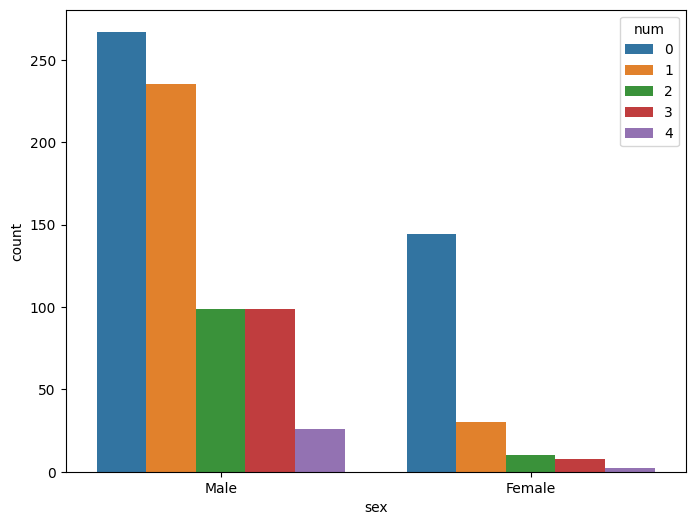

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="num", data=df)
plt.show()

In [18]:
fig=px.bar(df,x='dataset',color='sex')
fig.show()

In [19]:
df.groupby('dataset')['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

In [20]:
fig=px.bar(df,x='cp',color='sex')
fig.show()

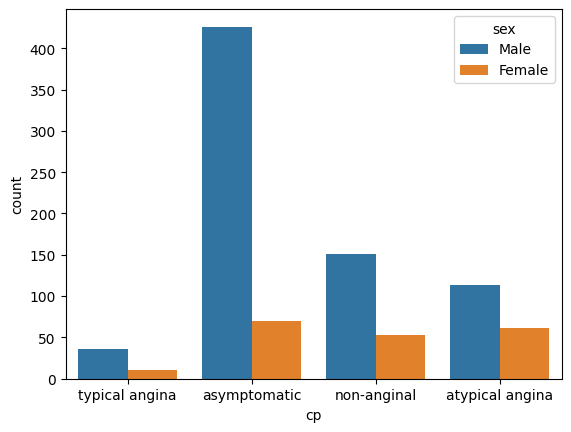

In [22]:
sns.countplot(df,x='cp',hue='sex')
plt.show()

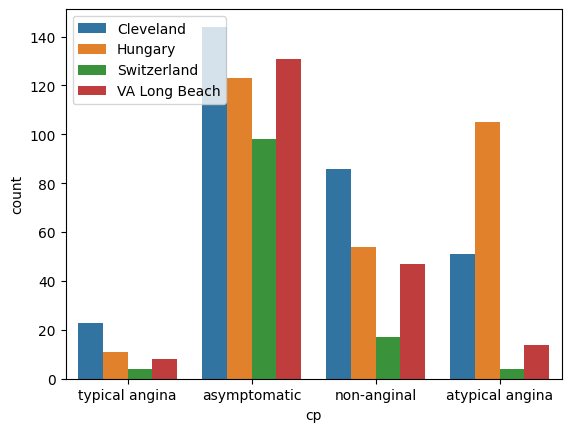

In [24]:
sns.countplot(df,x='cp',hue='dataset')
plt.legend(loc='upper left')
plt.show()

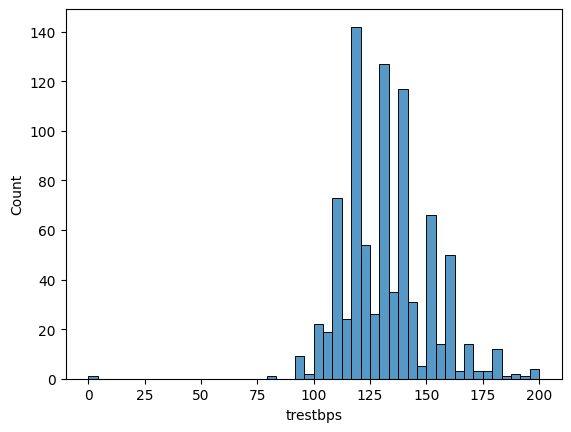

In [25]:
sns.histplot(df['trestbps'])
plt.show()

In [26]:
fig=px.histogram(df,x='age',color='sex')
fig.show()

In [12]:
# for numeric columns: we use median values to fill (impute) missing values

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

categorical_col=['fbs','restecg','exang','slope','thal']
categorical_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_col]=categorical_imputer.fit_transform(df[categorical_col])

In [13]:
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [48]:
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [14]:
columns_to_encode=['dataset','cp','restecg','slope','thal','sex','exang','fbs','num']

In [15]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for feature in columns_to_encode:
    df[feature]=encode.fit_transform(df[feature])

In [16]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


In [8]:
df.drop('ca',axis=1,inplace=True)

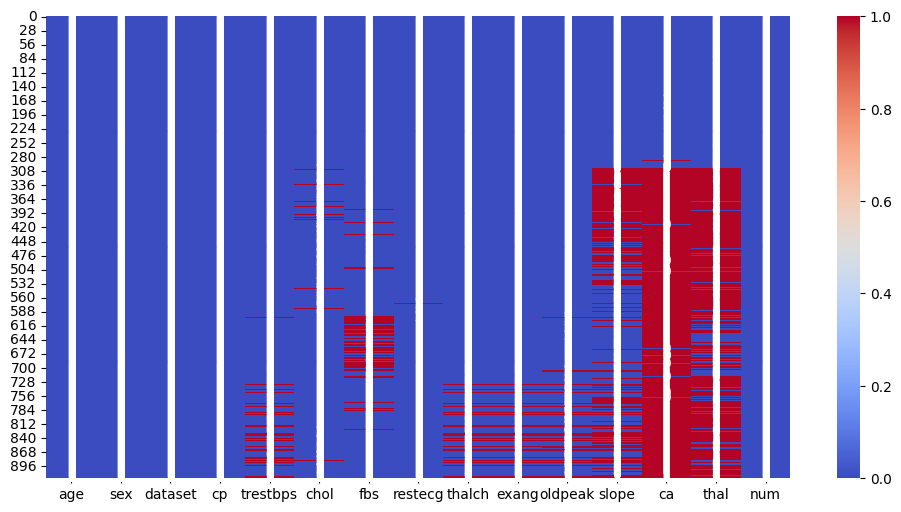

In [28]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),cmap='coolwarm',annot=True)
plt.show()

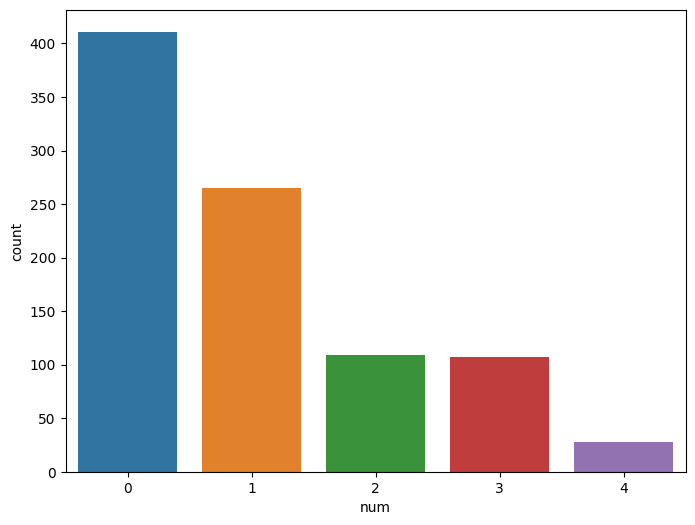

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="num", data=df)
plt.show()

## Removing outlier

In [ ]:
# def outlier_diagram(df,feature):
#     sns.distplot(df[feature])
#     plt.show()

In [31]:
feature_outlier=[feature for feature in df.columns if feature not in columns_to_encode]

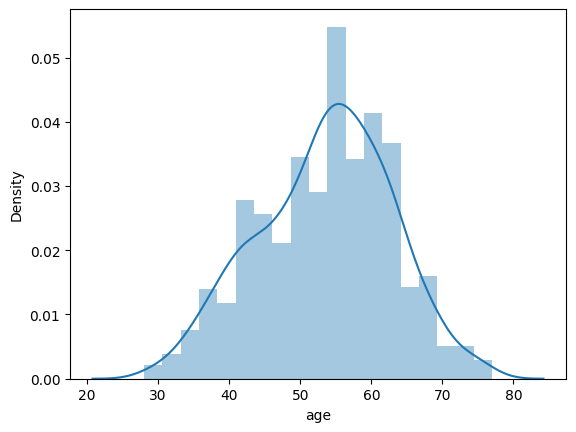

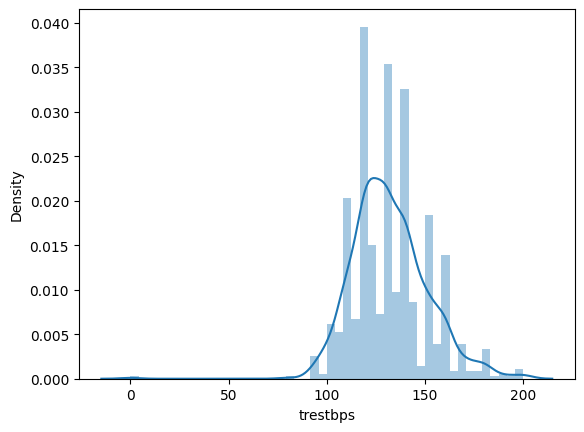

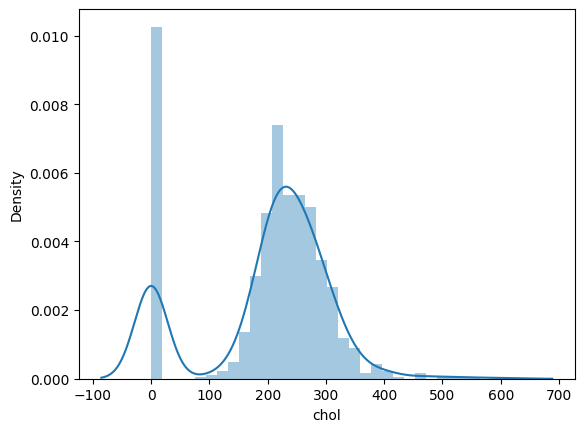

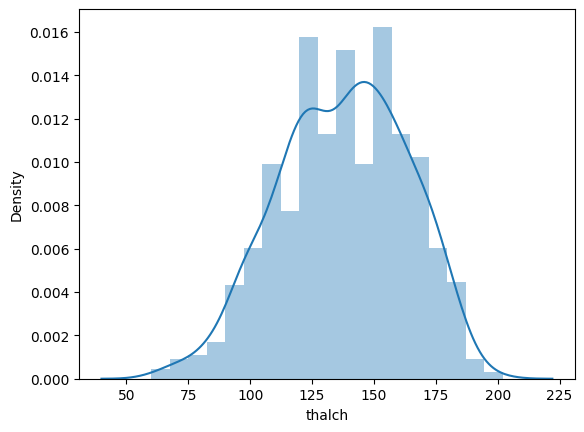

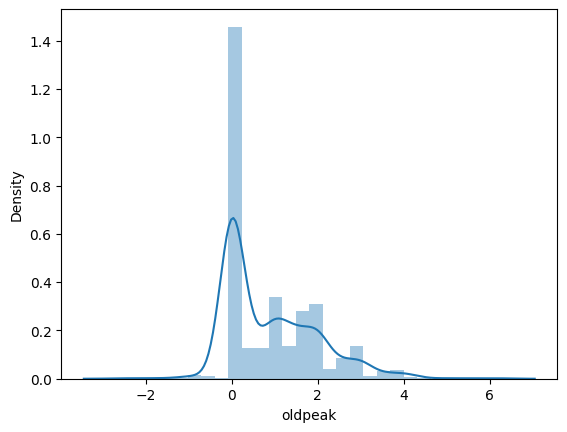

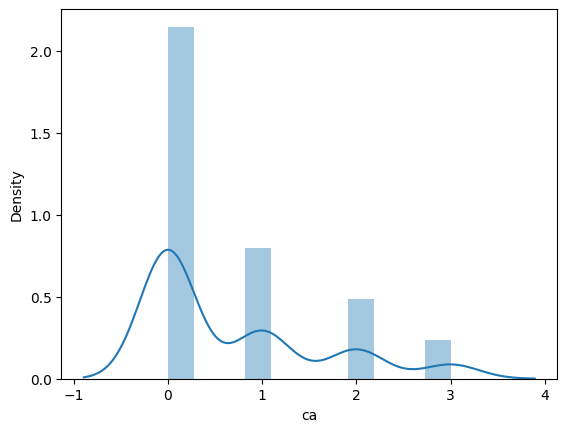

In [32]:
for feature in feature_outlier:
    if feature!='num':
        sns.distplot(df[feature])
        plt.show()

In [20]:
feature_for_boxplot=[feature for feature in df.columns if feature not in columns_to_encode and feature not in ['num','ca']]
def plot_boxplot(df,feature):
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()

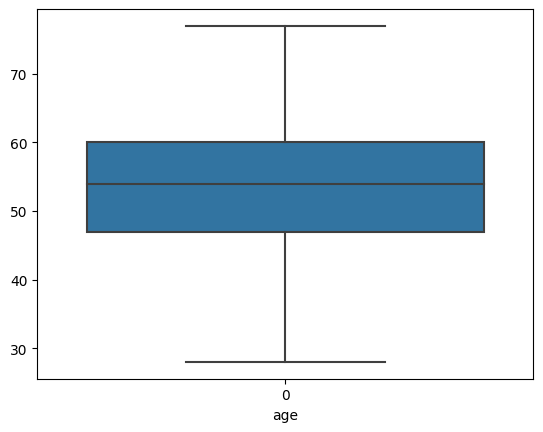

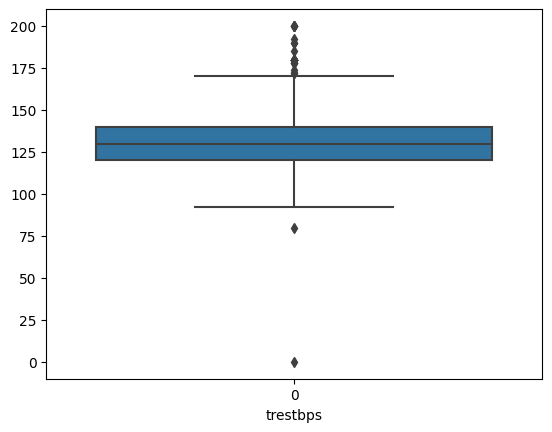

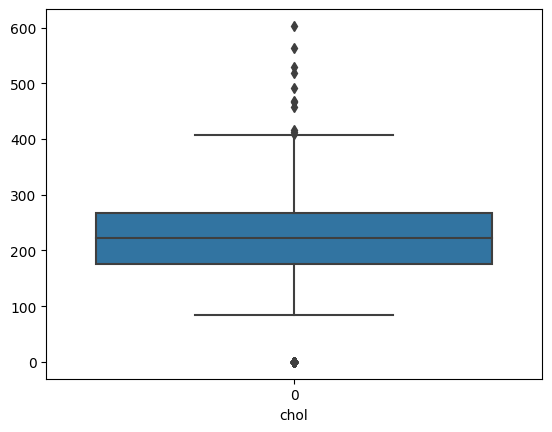

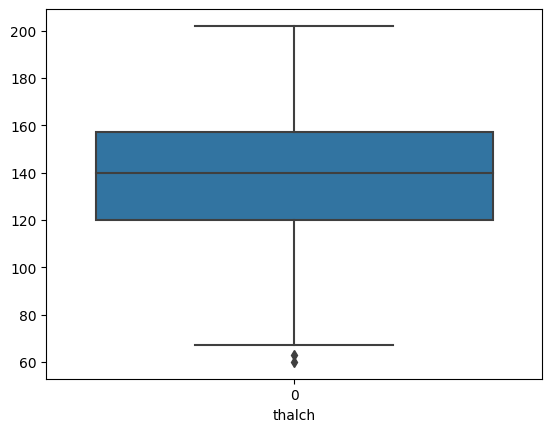

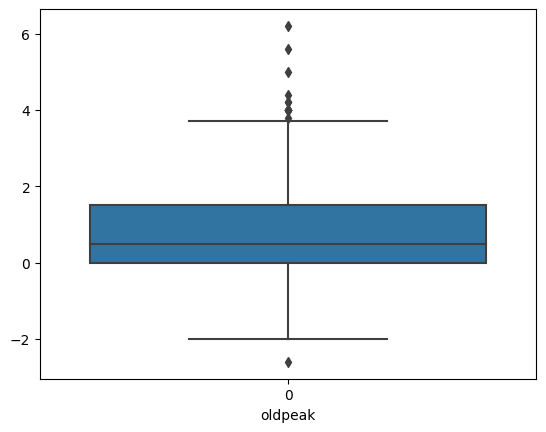

In [34]:
for feature in feature_for_boxplot:
    plot_boxplot(df,feature)
   

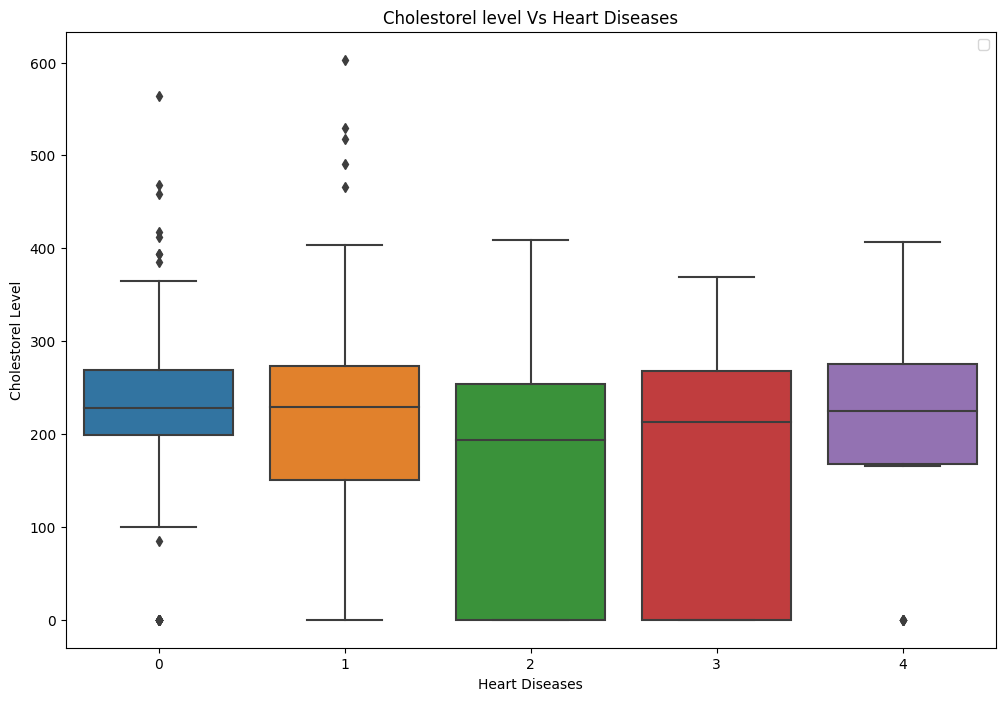

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(df,x='num',y='chol')
plt.title('Cholestorel level Vs Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestorel Level')
plt.show()

In [17]:
cols=['trestbps','chol']
df[cols]=df[cols].replace(0,np.nan)

In [10]:
df.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,919.000000,748.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,0.789130,1.238043,0.782609,132.139282,245.877005,0.150000,0.990217,137.692391,0.366304,0.853261,1.152174,1.158696,0.995652
std,265.725422,9.424685,0.408148,1.130673,0.956350,17.939385,57.530397,0.357266,0.631863,25.145235,0.482056,1.058049,0.516007,0.483493,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,0.000000,0.000000,120.000000,211.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,460.500000,54.000000,1.000000,1.000000,0.000000,130.000000,236.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,690.250000,60.000000,1.000000,2.000000,2.000000,140.000000,275.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000,2.000000
max,920.000000,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


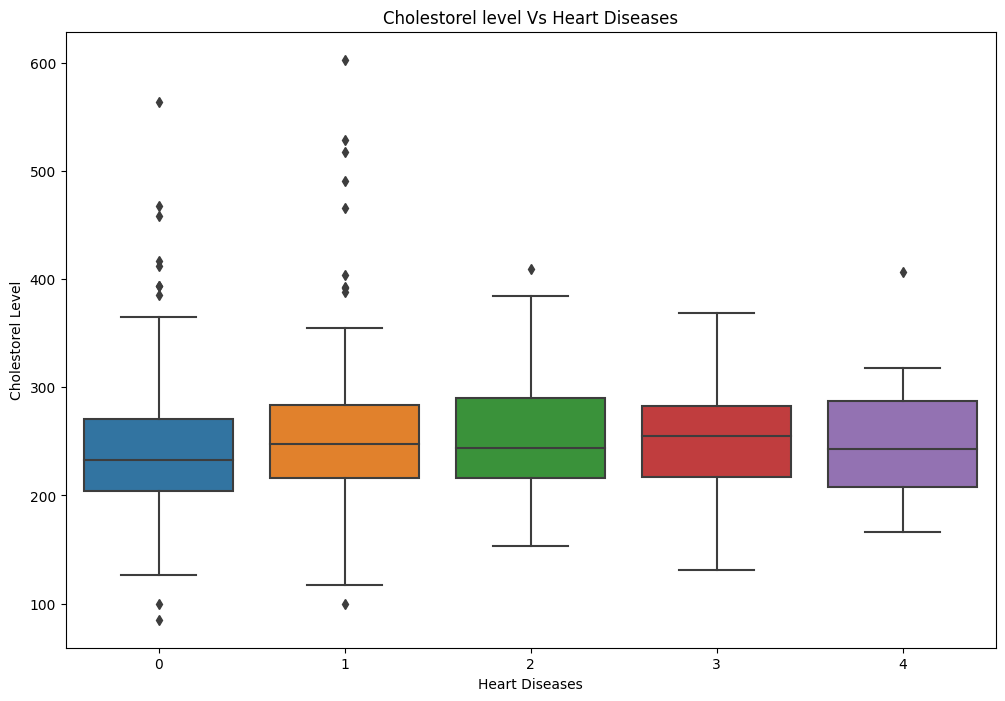

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(df,x='num',y='chol')
plt.title('Cholestorel level Vs Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestorel Level')
plt.show()

In [11]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol        172
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
thal          0
num           0
dtype: int64

In [19]:
def outlier_removal(df,feature):
    new_df=df.copy()
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    Higher=Q3+(1.5*IQR)
    Lower=Q1-(1.5*IQR)
    new_df[feature]=np.where(new_df[feature]>Higher,Higher,np.where(new_df[feature]<Lower,Lower,new_df[feature]))
    return new_df

In [21]:
new_df=df.copy()
for feature in feature_for_boxplot:
    if feature!='age':
        new_df=outlier_removal(new_df,feature)

In [ ]:
new_df.head()

In [ ]:
new_df.shape

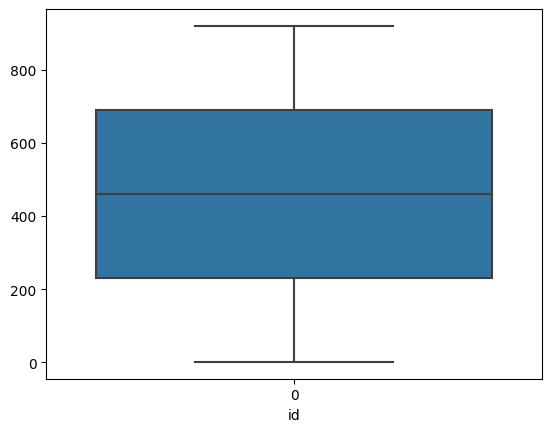

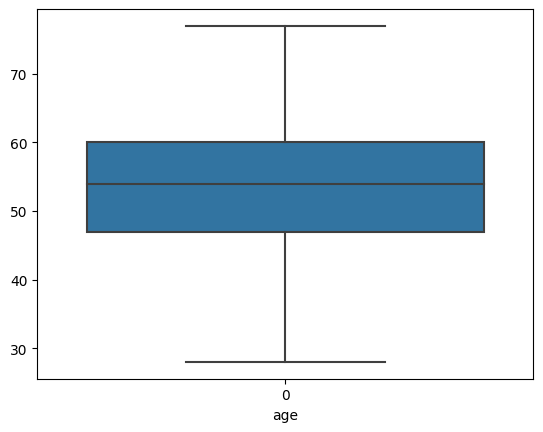

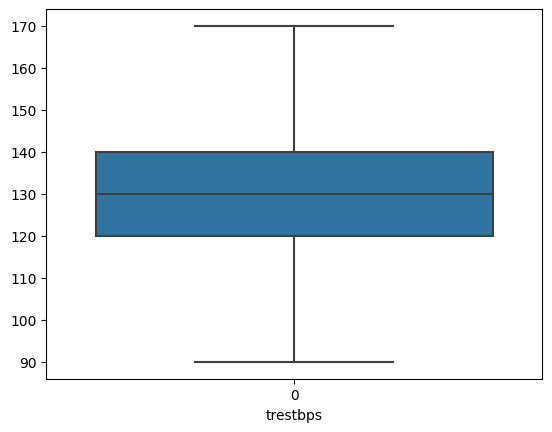

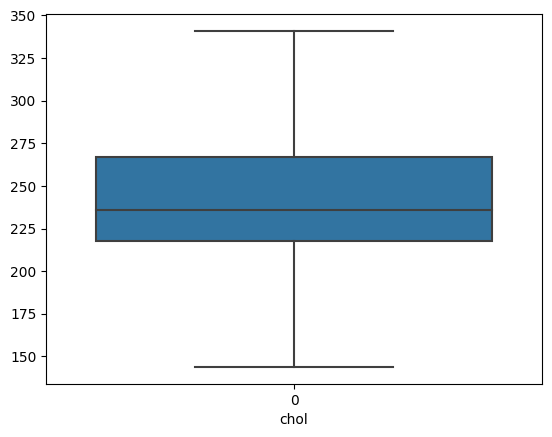

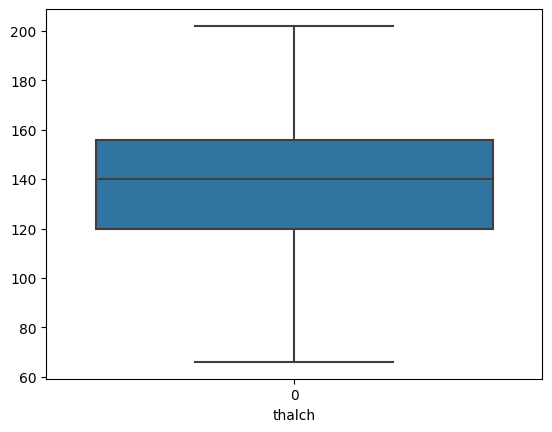

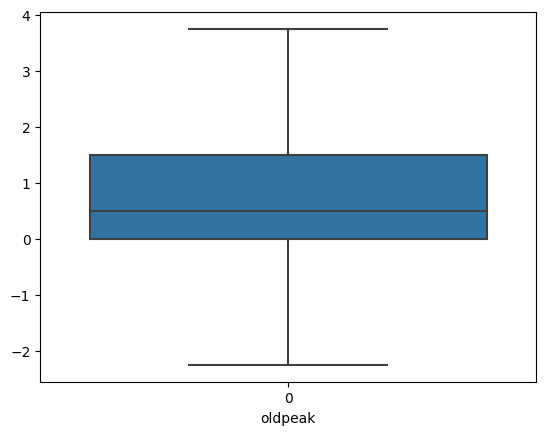

In [22]:
for feature in feature_for_boxplot:
    plot_boxplot(new_df,feature)

## Handling with missing values

In [ ]:
new_df=df.copy()
new_df.isna().sum()

In [ ]:
new_df.drop('ca',axis=1,inplace=True)

In [25]:
new_df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


In [ ]:
col=['oldpeak','trestbps','chol','thalch']

In [ ]:
def missing_values(df,feature):
    df[feature]=df[feature].fillna(df[feature].mean())
    return df
    

In [ ]:
for feature in col:
    new_df=missing_values(new_df,feature)

In [ ]:
sns.heatmap(new_df.isna(),cmap='coolwarm')
plt.show()

In [ ]:
new_df['num'].value_counts()

In [24]:
new_df.drop('id',axis=1,inplace=True)

In [ ]:
sns.pairplot(new_df)
plt.show()

# Feature Scaling

In [51]:
# from sklearn.preprocessing import MinMaxScaler

# columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
# scaler = MinMaxScaler()

# # Extract the columns to scale
# X_to_scale = df[columns_to_scale]

# # Fit and transform the scaler on the selected columns
# X_scaled = scaler.fit_transform(X_to_scale)

# # Replace the original columns with the scaled ones
# df[columns_to_scale] = X_scaled


In [52]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,0.714286,1,0,3,0.541667,0.285714,1,0,0.633803,0,0.556818,0,0,0
1,2,0.795918,1,0,0,0.666667,0.388031,0,0,0.338028,1,0.465909,1,1,2
2,3,0.795918,1,0,0,0.333333,0.277992,0,0,0.485915,1,0.590909,1,2,1
3,4,0.183673,1,0,2,0.416667,0.318533,0,1,0.894366,0,0.693182,0,1,0
4,5,0.265306,0,0,1,0.416667,0.229730,0,0,0.788732,0,0.454545,2,1,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# columns_to_scale=['oldpeak','thalch','chol','trestbps','age']
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# # min_max_scalers={}
# # for col in columns_to_scale:
# #     scaler=MinMaxScaler()
# #     df[col]=scaler.fit_transform(df[col])
# #     min_max_scalers[col]=scaler

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


In [ ]:
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Assuming X is your DataFrame
# x = X.copy()

# # Reshape the DataFrame to numpy array
# x_reshaped = x.values.reshape(-1, 1)

# # Now you can perform operations on x_reshaped
# features = MinMaxScaler().fit_transform(x_reshaped)


In [ ]:
# x_reshaped

In [ ]:
# xx=pd.DataFrame(features,index=X.index,columns=X.columns)
# xx.head()

In [ ]:
# scale_col=[feature for feature in X.columns if feature not in ['age','sex','dataset','cp'] ]
# def scale_column(column):
#     scaled_col=scaler.fit_transform(column.values.reshape(-1,1))
#     return pd.Series(scaled_col.flatten(),index=column.index)

In [ ]:
# scaled_df=new_df.apply(scale_col)
# scaled_df

## Train Test Split

In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

## Feature Selection Using Pearson's Corrleation

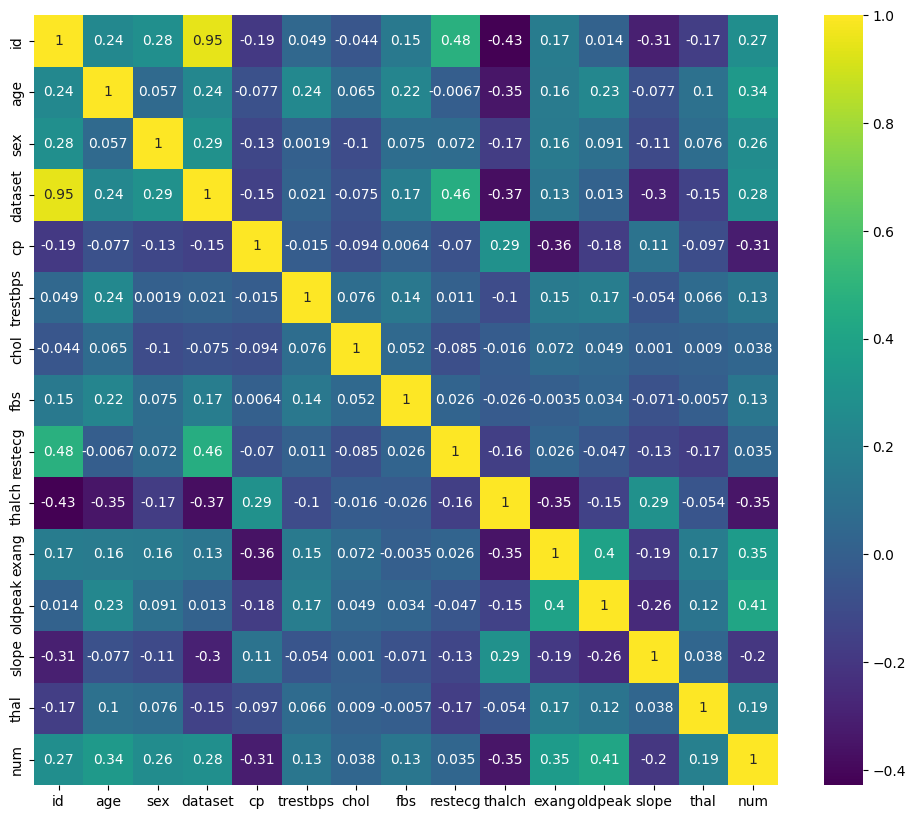

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

In [ ]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.copy()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [ ]:
result=correlation(X_train,0.3)

In [ ]:
result

# Select Best Feature

In [ ]:
X.head()

In [ ]:
# from sklearn.feature_selection import chi2 ,SelectKBest
# selector=SelectKBest(chi2,k='all')
# selector.fit_transform(X,y)
# selector.scores_
# selected_indices=selector.get_support(indices=True)
# selected_indices

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
est=DecisionTreeClassifier()
selector=RFECV(est,cv=5)
selector.fit(X,y)

RFECV(cv=5, estimator=DecisionTreeClassifier())

In [41]:
selector.n_features_

11

In [42]:
selector.support_

array([ True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True])

# Model Building 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## Logistic Regression

In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print(f'{np.round(accuracy_score(y_test,y_pred)*100,2)}%')

56.09%


In [41]:
def checking_score(X_train,X_test,y_train,y_test,model):
    model=model
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'Accuracy in {model}: {np.round(accuracy_score(y_test,y_pred)*100,2)}%')
    

In [42]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

for clf in classifiers:
    checking_score(X_train,X_test,y_train,y_test,clf)

Accuracy in LogisticRegression(): 56.09%
Accuracy in KNeighborsClassifier(): 57.39%
Accuracy in SVC(): 57.39%
Accuracy in DecisionTreeClassifier(): 56.52%
Accuracy in RandomForestClassifier(): 67.39%
Accuracy in GaussianNB(): 52.17%
Accuracy in GradientBoostingClassifier(): 63.04%
Accuracy in AdaBoostClassifier(): 60.87%


# HyperParameter Tuning

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
model_params ={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'KneighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':range(1,21,2)
        }
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_features':['sqrt','log2']
        }
    },

    'Naive_Bayes':{
        'model':GaussianNB(),
       'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scores = []
for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

best_model = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [ ]:
# best_model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV